# Keras

## Summary

- Introduction
- The Sequential model
- Layers API

## Introduction

### Keras in a nutshell

Keras is a high-level, user-friendly API for creating and training neural nets.

[![Keras logo](images/keras_logo.png)](https://keras.io)

### Keras and TensorFlow

- [TensorFlow](https://www.tensorflow.org/) is a platform for Machine Learning and Deep Learning created by Google.
- Originally, Keras could be used with many ML librairies as back-end for computations: TensorFlow 1.x, Theano, CNTK...
- Since TF 2.0, _tf.keras_ is the official high-level API of TensorFlow.
- The [2.3.0 release](https://github.com/keras-team/keras/releases/tag/2.3.0) (Sept. 2019) was the last major release of multi-backend Keras.
- "There is now only one Keras: *tf.keras*".

[TF 2.0 + Keras overview notebook](https://colab.research.google.com/drive/1UCJt8EYjlzCs1H1d1X0iDGYJsHKwu-NO)

## The Sequential model

### Description

A *Sequential* model creates a linear stack of layers where each layer has exactly one input tensor and one output tensor.

Upon adding a new layer to the stack, Keras can automatically infer its input shape from the output shape of the previous layer.

It is the easiest way to create simple neural networks architectures with Keras.

### Example: creating a fully connected neural network

A *fully connected* or *dense* neural network is an architecture where all the nodes (neurons) in one layer are connected to the neurons in the next layer.

#### Environment setup

In [1]:
import platform

print(f"Python version: {platform.python_version()}")
assert platform.python_version_tuple() >= ("3", "6")

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Python version: 3.7.5


In [2]:
# Setup plots
%matplotlib inline
plt.rcParams["figure.figsize"] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

In [3]:
import sklearn

print(f"scikit-learn version: {sklearn.__version__}")

from sklearn.datasets import make_blobs

import tensorflow as tf

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Flatten,
    Dropout,
    Conv1D,
    Conv2D,
    MaxPooling2D,
    SimpleRNN,
    LSTM,
    GRU,
)

scikit-learn version: 0.22.1
TensorFlow version: 2.0.0
Keras version: 2.2.4-tf


In [4]:
def plot_loss_acc(history):
    """Plot training and (optionally) validation loss and accuracy
    Takes a Keras History object as parameter"""

    loss = history.history["loss"]
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 10))

    plt.subplot(2, 1, 1)
    plt.plot(epochs, loss, ".--", label="Training loss")
    final_loss = loss[-1]
    title = "Training loss: {:.4f}".format(final_loss)
    plt.ylabel("Loss")
    if "val_loss" in history.history:
        val_loss = history.history["val_loss"]
        plt.plot(epochs, val_loss, "o-", label="Validation loss")
        final_val_loss = val_loss[-1]
        title += ", Validation loss: {:.4f}".format(final_val_loss)
    plt.title(title)
    plt.legend()

    acc = history.history["accuracy"]

    plt.subplot(2, 1, 2)
    plt.plot(epochs, acc, ".--", label="Training acc")
    final_acc = acc[-1]
    title = "Training accuracy: {:.2f}%".format(final_acc * 100)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    if "val_accuracy" in history.history:
        val_acc = history.history["val_accuracy"]
        plt.plot(epochs, val_acc, "o-", label="Validation acc")
        final_val_acc = val_acc[-1]
        title += ", Validation accuracy: {:.2f}%".format(final_val_acc * 100)
    plt.title(title)
    plt.legend()

#### Data generation

In [5]:
# Generate some data for training
# Each sample has 3 features and belongs to one of 2 classes
x_train, y_train = make_blobs(
    n_samples=1000, n_features=3, centers=2, cluster_std=2.0, random_state=11
)

#### Expected network architecture

![A simple neural network](images/neural_net2.jpeg)

#### Model creation

In [6]:
# Create a new sequential model
seq_model = Sequential()

# Add a 4-neurons layer using tanh as activation function
# Input shape corresponds the number of input features (here 3)
seq_model.add(Dense(4, activation='tanh', input_shape=(3,)))

# Add a 4-neurons layer using tanh
# Input shape is infered from previous layer
seq_model.add(Dense(4, activation='tanh'))

# Add a 1-neuron output layer using sigmoid
seq_model.add(Dense(1, activation='sigmoid'))

In [7]:
# Print a summary of model architecture
# (Can you justify the parameter counts for each layer?)
seq_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


#### Model compilation

In [8]:
# Configuration of the training process
#   optimizer: gradient descent optimization method
#   loss: loss function
#   metrics: list of metrics monitored during training and testing
seq_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

#### Model training

In [9]:
# Launch the training of the model on the data
#   epochs: number of epochs to train the model
#     An epoch is an iteration over the entire training dataset
#   batch_size: number of samples used for each gradient descent step
#     number of GD steps in an epoch = x_train.size / batch_size (rounded up)
#     total number of GD steps = epoch_GD_steps * epochs
#   verbose: level of information outputted during training
#     0 = silent, 1 = progress bar, 2 = one line per epoch
# The returned history object contains a record of loss and metrics values
history = seq_model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

Train on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 1s 852us/sample - loss: 1.0219 - accuracy: 0.2310
Epoch 2/10
1000/1000 [==============================] - 0s 71us/sample - loss: 0.8944 - accuracy: 0.2840
Epoch 3/10
1000/1000 [==============================] - 0s 73us/sample - loss: 0.7799 - accuracy: 0.3440
Epoch 4/10
1000/1000 [==============================] - 0s 78us/sample - loss: 0.6694 - accuracy: 0.4490
Epoch 5/10
1000/1000 [==============================] - 0s 77us/sample - loss: 0.5660 - accuracy: 0.8050
Epoch 6/10
1000/1000 [==============================] - 0s 72us/sample - loss: 0.4742 - accuracy: 0.9420
Epoch 7/10
1000/1000 [==============================] - 0s 70us/sample - loss: 0.3941 - accuracy: 0.9840
Epoch 8/10
1000/1000 [==============================] - 0s 69us/sample - loss: 0.3252 - accuracy: 0.9920
Epoch 9/10
1000/1000 [==============================] - 0s 68us/sample - loss: 0.2677 - accuracy: 0.9930
Epoch 10/10
1000/1000 [=========

#### Model evaluation

In [10]:
# Compute the loss & metrics values for the trained network
loss, acc = seq_model.evaluate(x_train, y_train, verbose=0)

print(f"Training loss: {loss:.05f}")
print(f"Training accuracy: {acc:.05f}")

Training loss: 0.19941
Training accuracy: 0.99400


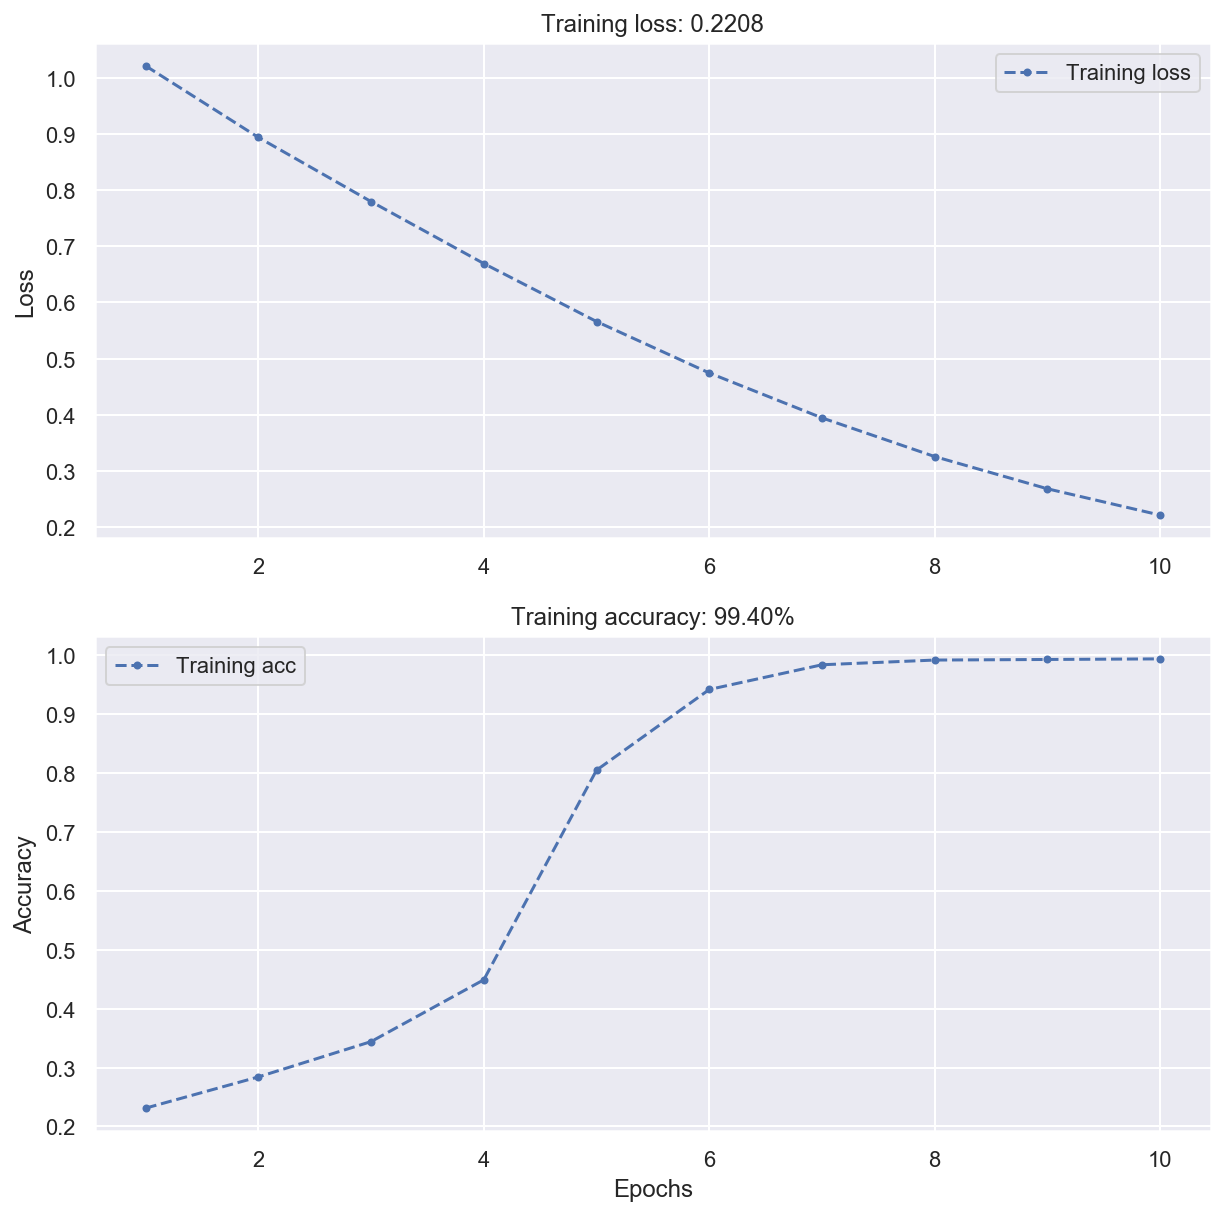

In [11]:
# Plot training metrics
plot_loss_acc(history)

## Layers API

### What is a layer?

Layers are the basic building blocks of neural networks in Keras.

A layer is a simple input-output transformation. It encapsulates a state (weights) and some computation.

Keras offers many layers for various purposes (convolution, pooling, reshaping...). See the [official documentation](https://keras.io/api/layers/) for details.

### Core layers

#### Dense layer

Defines a fully connected layer. Implements a weighted sum of its inputs plus a bias.

- Input shape: *(batch_size, input_dim)*
- Output shape: *(batch_size, units)*

In [12]:
# units: number of neurons in the layer
# activation: activation function
dense_layer = Dense(units=3, activation='relu')

#### Flatten layer

Flattens its input without affecting the batch size. Often used before a *Dense* layer.

- Input shape: *(batch_size, input_dim1, input_dim2, ...)*
- Output shape: *(batch_size, product of input dimensions)*

In [13]:
flatten_layer = Flatten()

# Create a 4D tensor
input = np.random.rand(32, 3, 3, 64).astype(np.float32)
output = flatten_layer(input)
# 576 = 3*3*64
print(f"Output: {output.shape}")

Output: (32, 576)


#### Dropout layer

Applies Dropout to the input, randomly setting input units to 0 with a frequency of *rate* at each step during training time, which helps prevent overfitting.

Output shape is not modified.

- Input shape: *(batch_size, input_dim1, input_dim2, ...)*
- Output shape: *(batch_size, input_dim1, input_dim2, ...)*

In [14]:
# rate: percentage of input units randomly set to 0 during training
dropout_layer = Dropout(rate=.2)

### Convolution layers

#### Conv1D layer

Creates a convolution kernel that is convolved with the layer input over a single spatial (or temporal) dimension to produce a tensor of outputs.

- Input shape: *(batch size, time steps, features)*
- Output shape: *(batch_size, new time steps, filters)*. *new time steps* is typically lower than input *time steps*.

In [15]:
# The inputs are 128-length vectors with 10 timesteps, and the batch size is 4
inputs = np.random.random([4, 10, 128]).astype(np.float32)

# filters: number of output filters in the convolution
# kernel_size: length of the 1D convolution window
# activation: activation function
# padding: padding of the input such that output has the same height/width dimension
#   "valid": no padding, "same": padding enabled
conv1d_layer = Conv1D(filters=32, kernel_size=3, activation="relu", padding="valid")
output = conv1d_layer(inputs)
# Input data has 10 timesteps. The 1D convolution with kernels of size 3 gives 8 new time steps
print(output.shape)  # (4, 8, 32)

(4, 8, 32)


#### Conv2D layer

Creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs, implementing spatial convolution over images.

- Input shape: *(batch_size, rows, cols, channels)*
- Output shape: *(batch_size, new_rows, new_cols, filters)*

In [16]:
# filters: number of output filters in the convolution
# kernel_size: height and width of the 2D convolution window
# activation: activation function
# padding: padding of the input such that output has the same height/width dimension
#   "valid": no padding, "same": padding enabled
conv2d_layer = Conv2D(
    filters=64, kernel_size=(3, 3), activation="relu", padding="valid"
)

#### MaxPooling2D layer

Implements the Max pooling operation for 2D spatial data.

- Input shape: *(batch_size, rows, cols, channels)*
- Ouput shape: *(batch_size, pooled_rows, pooled_cols, channels)*

In [17]:
# pool_size: window size over which to take the maximum
# padding: padding of the input such that output has the same height/width dimension
#   "valid": no padding, "same": padding enabled
maxpool2d_layer = MaxPooling2D(pool_size=(2, 2), padding="valid")

### Recurrent layers

#### SimpleRNN layer

Fully connected RNN where  the output from previous timestep is to be fed as input at next timestep. Can output the values for the last time step (a single vector per sample), or the whole output sequence ((one vector per timestep per sample).

- Input shape: *(batch size, time steps, features)*
- Output shape: 
  - *(batch size, units)* if attribute `return_sequences` is `False`.
  - *(batch size, time steps, units)* if attribute `return_sequences` is `True`.

In [18]:
# Generate random data
inputs = np.random.random([32, 10, 8]).astype(np.float32)

# units: number of cells inside the layer
simplernn_layer = SimpleRNN(units=4)
output = simplernn_layer(inputs)
print(output.shape)  # (32, 4)

# return_sequences: whether to return the last output in the output sequence, or the full sequence.
simplernn_layer = SimpleRNN(units=4, return_sequences=True)
output = simplernn_layer(inputs)
print(output.shape)  # (32, 10, 4)

(32, 4)
(32, 10, 4)


#### LSTM layer

Long Short-Term Memory layer. API is similar to `SimpleRNN`.

- Input shape: *(batch size, time steps, features)*
- Output shape: 
  - *(batch size, units)* if attribute `return_sequences` is `False`.
  - *(batch size, time steps, units)* if attribute `return_sequences` is `True`.

In [19]:
# Generate random data
inputs = np.random.random([32, 10, 8]).astype(np.float32)

# units: number of cells inside the layer
lstm_layer = LSTM(units=4)
output = lstm_layer(inputs)
print(output.shape)  # (32, 4)

# return_sequences: whether to return the last output in the output sequence, or the full sequence.
lstm_layer = LSTM(units=4, return_sequences=True)
output = lstm_layer(inputs)
print(output.shape)  # (32, 10, 4)

(32, 4)
(32, 10, 4)


#### GRU layer

Gated Recurrent Unit layer. API is similar to `SimpleRNN`.

- Input shape: *(batch size, time steps, features)*
- Output shape: 
  - *(batch size, units)* if attribute `return_sequences` is `False`.
  - *(batch size, time steps, units)* if attribute `return_sequences` is `True`.

In [20]:
# Generate random data
inputs = np.random.random([32, 10, 8]).astype(np.float32)

# units: number of cells inside the layer
gru_layer = GRU(units=4)
output = gru_layer(inputs)
print(output.shape)  # (32, 4)

# return_sequences: whether to return the last output in the output sequence, or the full sequence.
gru_layer = GRU(units=4, return_sequences=True)
output = gru_layer(inputs)
print(output.shape)  # (32, 10, 4)

(32, 4)
(32, 10, 4)
